In [20]:
import torch
import matplotlib.pyplot as plt
import numpy as np


In [21]:
#load pkl files and plot the data
regression_theta = np.load('tensor_collection\\regression_theta.pkl', allow_pickle=True)
regression_train_loss = np.load('tensor_collection\\regression_train_loss.pkl', allow_pickle=True)
regression_val_loss = np.load('tensor_collection\\regression_val_loss.pkl', allow_pickle=True)
cm_x_test = torch.load('tensor_collection\\cm_x_test.pt')
cm_y_test = torch.load('tensor_collection\\cm_y_test.pt')


Text(0, 0.5, 'Loss')

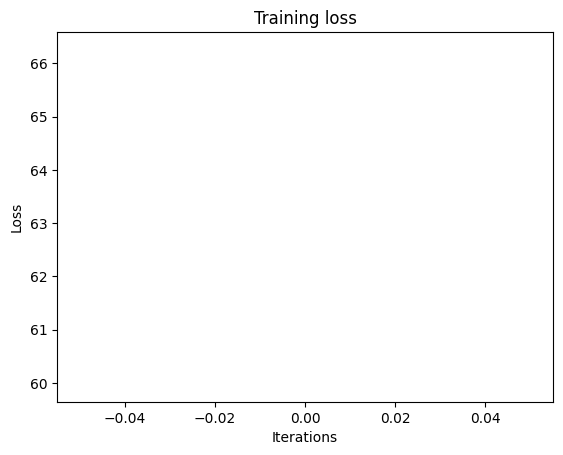

In [22]:
# plot the losses over time
plt.figure(0)
plt.plot(regression_train_loss)
plt.plot(regression_val_loss)
plt.title('Training loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')

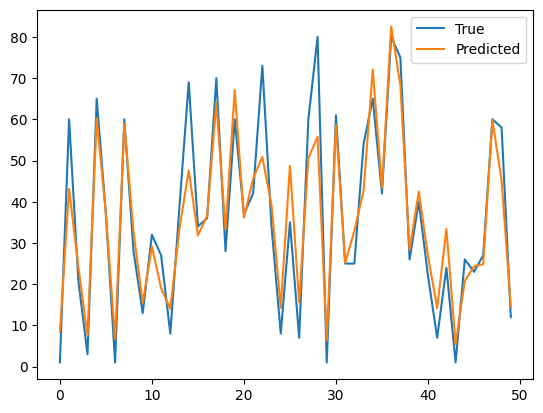

In [23]:
cm_y_hat = cm_x_test @ regression_theta

plt.figure(1)
plt.plot(cm_y_test[0:50])
plt.plot(cm_y_hat[0:50])
plt.legend(['True', 'Predicted'])

MSE:  64.96592812669239
RMSE:  8.06014442343885
MAE:  6.09584215723776
R-Squared:  0.835548050699267
Adjusted R-Squared:  0.8346410183102515
MAPE:  0.5712039689333546


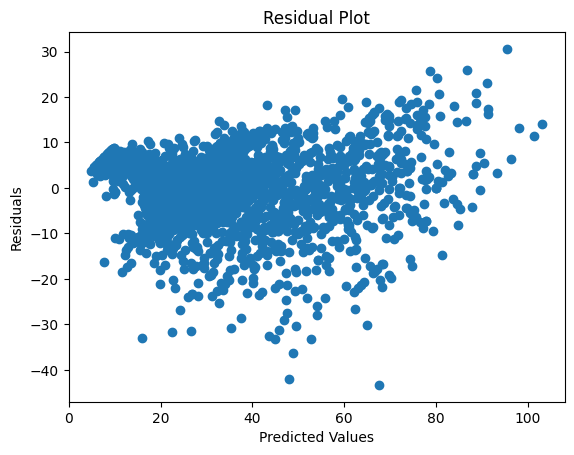

In [24]:
#calculate MSE
MSE = np.sum((cm_y_hat - cm_y_test)**2)/len(cm_y_test)
print('MSE: ', MSE)

#calculate RMSE
RMSE = np.sqrt(MSE)
print('RMSE: ', RMSE)

#calculate MAE
MAE = np.sum(np.abs(cm_y_hat - cm_y_test))/len(cm_y_test)
print('MAE: ', MAE)

#calculate R-Squared
R_squared = 1 - (np.sum((cm_y_hat - cm_y_test)**2)/np.sum((cm_y_test - np.mean(cm_y_test))**2))
print('R-Squared: ', R_squared)

#calculate Adjusted R-Squared
Adjusted_R_squared = 1 - (1-R_squared)*(len(cm_y_test)-1)/(len(cm_y_test)-len(regression_theta)-1)
print('Adjusted R-Squared: ', Adjusted_R_squared)

#calculate Mean Absolute Percentage Error
MAPE = np.sum(np.abs((cm_y_hat - cm_y_test)/cm_y_test))/len(cm_y_test)
print('MAPE: ', MAPE)

#Residual Plot
plt.figure(2)
plt.scatter(cm_y_hat, cm_y_hat-cm_y_test)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


Final validation loss: 392.22238


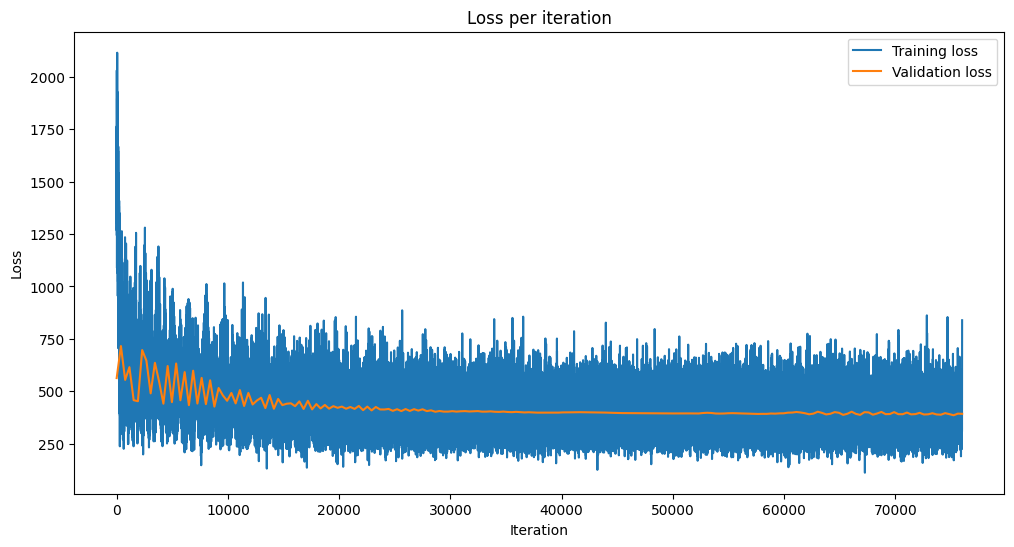

In [25]:
#load 
train_losses = torch.load('tensor_collection\\cnn_train_losses.pt')
val_losses = torch.load('tensor_collection\\cnn_val_losses.pt')
epochs = torch.load('tensor_collection\\cnn_epochs.pt')

plt.figure(0, figsize = (12,6))
plt.title('Loss per iteration')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.plot(train_losses)
plt.plot(np.linspace(0,len(train_losses),epochs), val_losses)
plt.legend(["Training loss","Validation loss"])
print('Final validation loss:',val_losses[-1])